# Sprint 4: Visualización gráfica de datos. Visualización exploratoria

## Tarea M4 T01


In [10]:
#Ejercicio 1:Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

#Crea al menos una visualización para:

#Una variable categórica (Distrito o Barrio)
#Una variable numérica (Precio)
#Una variable numérica y una categórica (Distrito y Precio)
#Dos variables numéricas (Año o Trimestre y Precio)
#Tres variables (Barrio o Distrito, Trimestre y Precio)

import matplotlib
import pandas as pd 

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")

df.head()
               

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [3]:
df.shape

(584, 8)

In [4]:
df.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [ ]:
# limpieza de datos, eliminar datos redundantes: 

df.drop(['Codi_Districte', 'Codi_Barri'], axis=1, inplace=True)


He eliminado las columnas 'Codi_Districte y 'Codi_Barri' porque me parecio que no eran necesarios. He decidio mantener solo el nombre del distrito y del barrio en lugar de códigos para hacer que los datos sean más legibles y comprensibles al momento de trabajar con ellos.

In [10]:
df.head()

,Any,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,Ciutat Vella,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,Ciutat Vella,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,Eixample,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [42]:
df.dtypes

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object

In [41]:
#Resumen Estadistico

import pandas as pd

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')


resumen_estadistico_por_distrito = df.groupby('Nom_Districte')['Preu'].agg(['mean', 'median'])
moda_por_distrito = df.groupby('Nom_Districte')['Preu'].apply(lambda x: x.mode())
resumen_estadistico_por_distrito['Moda'] = moda_por_distrito
resumen_estadistico_por_distrito.columns = ['Media', 'Mediana', 'Moda']

print("Resumen Estadístico por Distrito:")
print(resumen_estadistico_por_distrito)






Resumen Estadístico por Distrito:
                          Media  Mediana  Moda
Nom_Districte                                 
Ciutat Vella         436.350000   387.80   NaN
Eixample             506.922917   450.55   NaN
Gràcia               445.322500   379.85   NaN
Horta-Guinardó       388.497500   333.45   NaN
Les Corts            614.037500   460.30   NaN
Nou Barris           337.607500   250.40   NaN
Sant Andreu          366.175000   230.00   NaN
Sant Martí           464.945000   358.90   NaN
Sants-Montjuïc       405.805357   352.85   NaN
Sarrià-Sant Gervasi  643.112500   504.05   NaN


Este resumen estadístico que incluye la media, la mediana y la moda de los precios de alquiler para cada distrito. Permite identificar tendencias en la distribución de los precios de alquiler en diferentes áreas geográficas y entender cuáles son los valores más representativos en cada distrito.

La columna "Media" muestra el precio promedio de alquiler en cada distrito. Vemos que Sarrià-Sant Gervasi tiene el precio de alquiler promedio más alto, con 643.11 euros, lo que sugiere que es el distrito más caro para alquilar una propiedad.
Mientra que el Nou Barris tiene el precio de alquiler promedio más bajo, con 337.61 euros, lo que indica que es el distrito más asequible en términos de alquiler.

La columna "Moda" está representada como NaN (no disponible). Esto podría significar que no hay un valor de alquiler que se repita con mayor frecuencia en los datos para cada distrito.

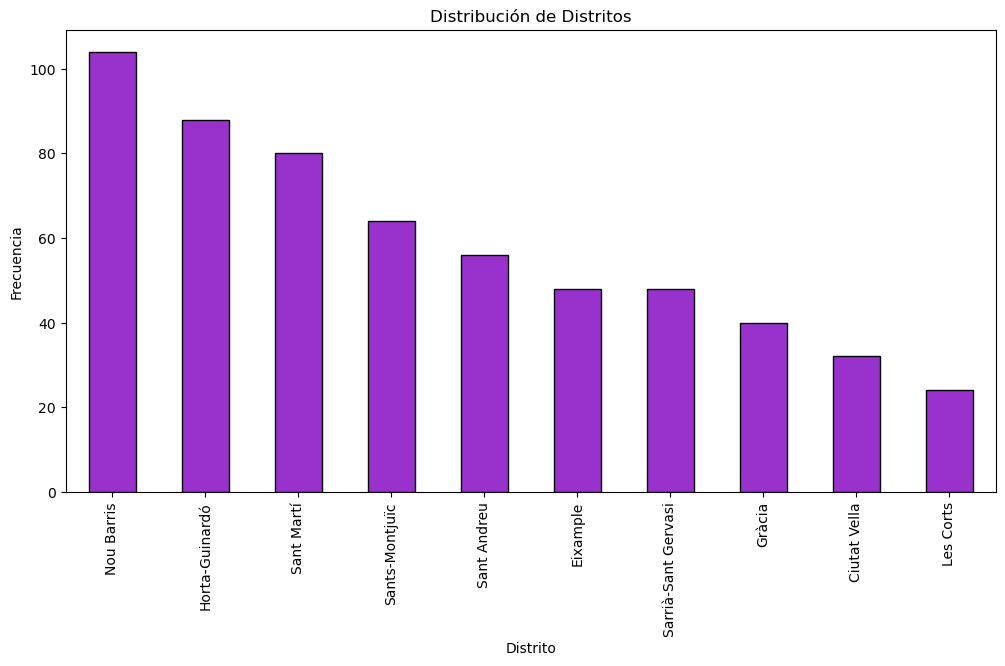

In [6]:
#Visualización: Una variable categórica (Distrito o Barrio)

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")

frecuencia_distrito = df['Nom_Districte'].value_counts()
plt.figure(figsize=(12, 6))
frecuencia_distrito.plot(kind='bar', color='DarkOrchid', edgecolor='black')
plt.title('Distribución de Distritos')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

Para la visualización de la variable categórica 'Distrito', he utilizado un gráfico de barras que muestra la frecuencia de los distritos en el conjunto de datos. Cada barra representa un distrito y la altura de cada barra indica cuántas veces aparece ese distrito en los datos.

Este tipo de gráficos es útil para obtener una vista general de la distribución de una variable categórica. Se puede utilizar esta información para comprender mejor los datos que tenemos y orientar un futuro análisis o tomar decisiones relacionadas con la distribución de los distritos en el área de estudio

En el gráfico de barras "Nou Barris" aparece con una frecuencia mayor que "Les Corts", significa que en el conjunto de datos tenemos más registros o datos asociados al distrito "Nou Barris" que al distrito "Les Corts". En términos simples, hay más información o registros relacionados con propiedades, alquileres u otros elementos en el distrito "Nou Barris" que en el distrito "Les Corts".

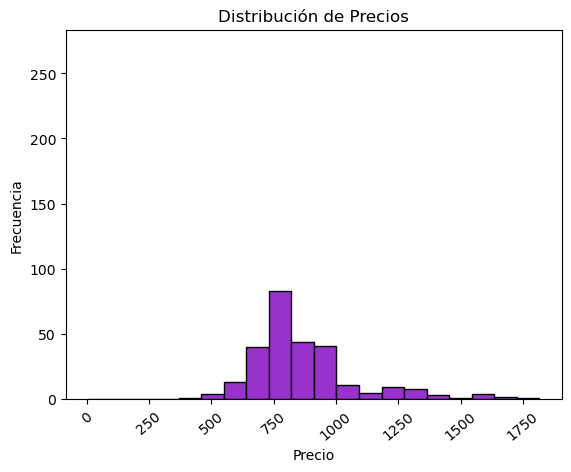

In [32]:
#Visualización: Una variable numérica (Precio)

import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")

n, bins, patches = plt.hist(df['Preu'], bins=20, color='DarkOrchid', edgecolor='black')
patches[0].set_height(0)  

plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=40)
plt.show()




Para la visualización de la variable numérica 'Precio', he utilizado un histograma que muestra la distribución de los precios en el conjunto de datos. Este gráfico es una herramienta útil para comprender la distribución de precios en tu conjunto de datos, identificar tendencias y detectar valores atípicos.

En este hitograma observamos una columna con un precio de 750 euros que tiene una frecuencia entre 50 y 100, esto sugiere que el precio de 750 es un valor que ocurre con bastante frecuencia en tu conjunto de datos de precios. En el contexto de una distribución de precios, esto podría significar por ejemplo

La existencia de un precio de 750 euros como valor común entre el precio de alquiler que estamos analizando. Tambien podria tartarse de un valor de referencia en el conjunto de datos, y otros precios podrían estar relacionados con él o ajustarse en función de este valor.



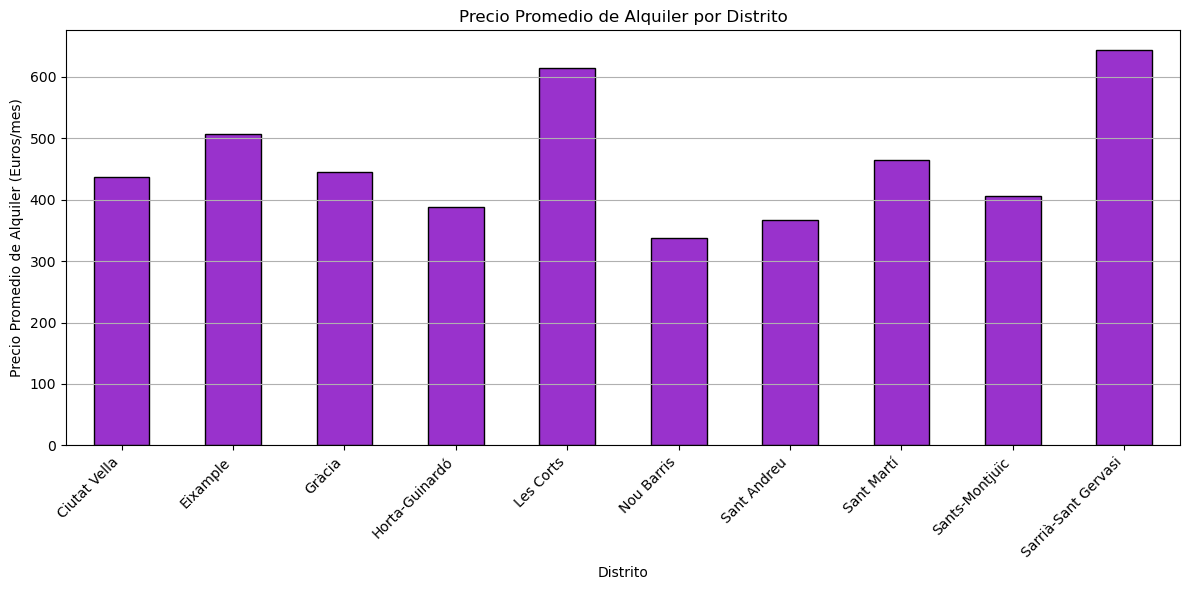

In [33]:
#Una variable numérica y una categórica (Distrito y Precio)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")

precio_promedio_por_distrito = df.groupby('Nom_Districte')['Preu'].mean()

plt.figure(figsize=(12, 6))  
precio_promedio_por_distrito.plot(kind='bar', color='DarkOrchid', edgecolor='black')
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio de Alquiler (Euros/mes)')
plt.title('Precio Promedio de Alquiler por Distrito')
plt.grid(axis='y')  

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()





Para la visualización de dos variables, una numérica 'Precio' y otra categórica 'Distrito', he vuelto a utilizar un gráfico de barras que muestra el precio promedio de alquiler por distrito. Aquí podemos comparar cómo varían los precios de alquiler en diferentes distritos del área de estudio.

 el gráfico muestra que los precios de alquiler varían significativamente entre diferentes distritos de la ciudad, lo que refleja las diferentes características y demandas de cada área. Les Corts y Sarrià-Sant Gervasi son los distritos con precios de alquiler más altos, mientras que Nou Barris y Sant Andreu son los distritos con precios más bajos.

 Estos resultados pueden indicar una segmentación clara en el mercado de alquiler de la ciudad. Es decir, algunos distritos se consideran más exclusivos o tienen propiedades de mayor valor, mientras que otros son más asequibles.


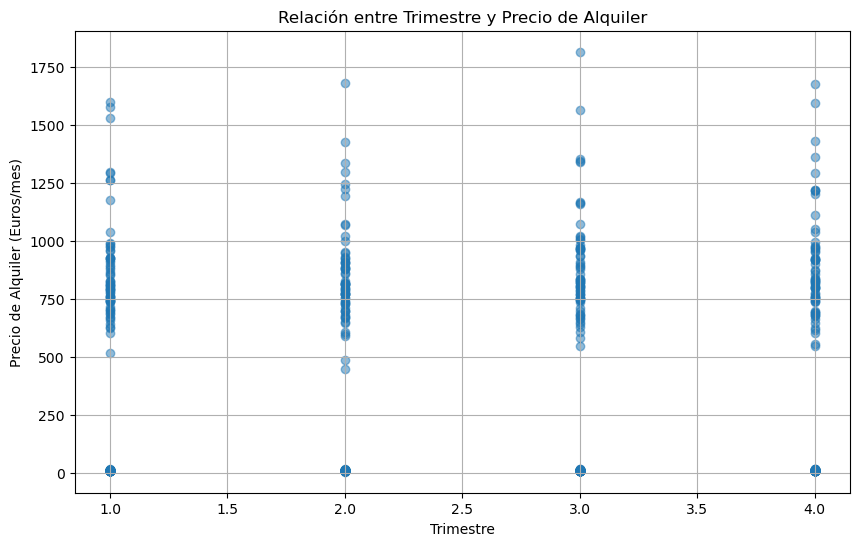

In [17]:
#Dos variables numéricas (Año o Trimestre y Precio)

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')

trimestre_col = 'Trimestre'
precio_col = 'Preu'

plt.figure(figsize=(10, 6))
plt.scatter(df[trimestre_col], df[precio_col], alpha=0.5)
plt.xlabel('Trimestre')
plt.ylabel('Precio de Alquiler (Euros/mes)')
plt.title('Relación entre Trimestre y Precio de Alquiler')

plt.grid(True)
plt.show()


Para las dos variables numéricas, he utilizado un gráfico de dispersión para representar su relación. Muestra la distribución conjunta de los datos y permite identificar patrones, tendencias y relaciones. Específicamente, en este gráfico se observa cómo los precios de alquiler varían a lo largo de diferentes trimestres. Este gráfico sirve como punto de partida para investigaciones más detalladas sobre las tendencias temporales en los precios de alquiler.

Existen más puntos concentrados en el rango de precios entre 500 y 1000, con algunos puntos más dispersos en precios más altos, lo que sugiere que  estos son precios comunes o típicos para el período de tiempo que abarcan los cuatro trimestres. Esto podría ser representativo de la mayoría de las transacciones de alquiler durante ese período. 

Los puntos dispersos en precios más altos indica que, aunque los precios comunes están en el rango de 500 a 1000, también hay propiedades que se alquilan a precios más altos. Esto podría deberse a características únicas, ubicación privilegiada u otros factores que justifican precios más elevados.

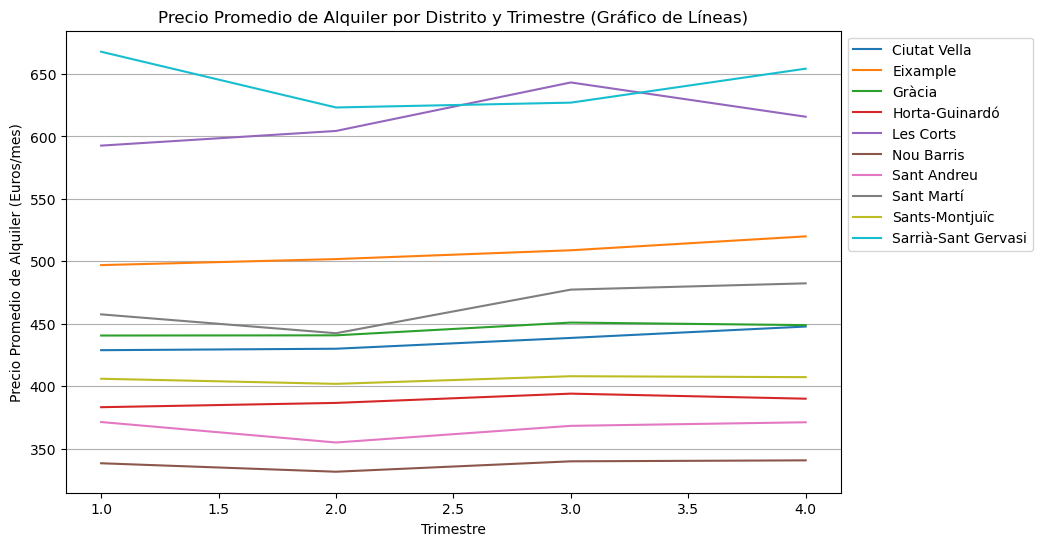

In [21]:
#Tres variables (Barrio o Distrito, Trimestre y Precio)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')

resumen_por_distrito_trimestre = df.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for distrito in resumen_por_distrito_trimestre.index:
    plt.plot(resumen_por_distrito_trimestre.columns, resumen_por_distrito_trimestre.loc[distrito], label=distrito)

# Etiquetas y Título
plt.xlabel('Trimestre')
plt.ylabel('Precio Promedio de Alquiler (Euros/mes)')
plt.title('Precio Promedio de Alquiler por Distrito y Trimestre (Gráfico de Líneas)')

# Leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Cuadrícula
plt.grid(axis='y')


El gráfico de líneas por distrito que muestra los datos de precios promedio de alquiler a lo largo de varios trimestres proporciona una visualización detallada y analítica de cómo han evolucionado los precios de alquiler en diferentes distritos a lo largo del tiempo.

Cada línea en el gráfico representa un distrito específico de la ciudad. Siguiendo una línea en particular, puedes observar cómo los precios promedio de alquiler han fluctuado trimestre tras trimestre en ese distrito en particular.Algunos distritos pueden mostrar tendencias claras de aumento o disminución en los precios a lo largo del tiempo, mientras que otros pueden mantenerse relativamente estables. Por ejemplo:

Vemos claramente que los barrios se mantienen mas estables en los 4 trimestres son: Nou Barris, Sants-Montjuic, Horta-guinardó.
Mientras que los que mas altibajos sufrieron en el 2do y 3er timestre fueros los siguinetes distritos: San Martí y Gracia.
Por otro lado vemos que Les Corts y Sarrià-Sant Gervasi se etrelazan entre ellos señalando un desenso en el segundo trimestre para luego Les corts subir en el tercer trimeste. Esto podría sugerir un aumento en la demanda de alquiler o una mayor inversión en propiedades en ese distrito durante ese trimestre. Sarrià-Sant Gervasi parece mantenerse estable entre el 2do y el 3er trimestre pero luego en el cuarto trimestre los dos se invierten. Esto indica que Estos distritos podrían estar compitiendo por inquilinos en el mismo mercado de alquiler. Las estrategias de fijación de precios de los propietarios o la percepción de valor de los inquilinos podrían haber cambiado, lo que afectaría a los precios de manera diferente en cada distrito.



In [ ]:
#Ejercicio 2: Exporta los gráficos como imágenes o HTML.

#He exportado los gráficos en html, adjuntaré el codigo que utilice para esto en github.






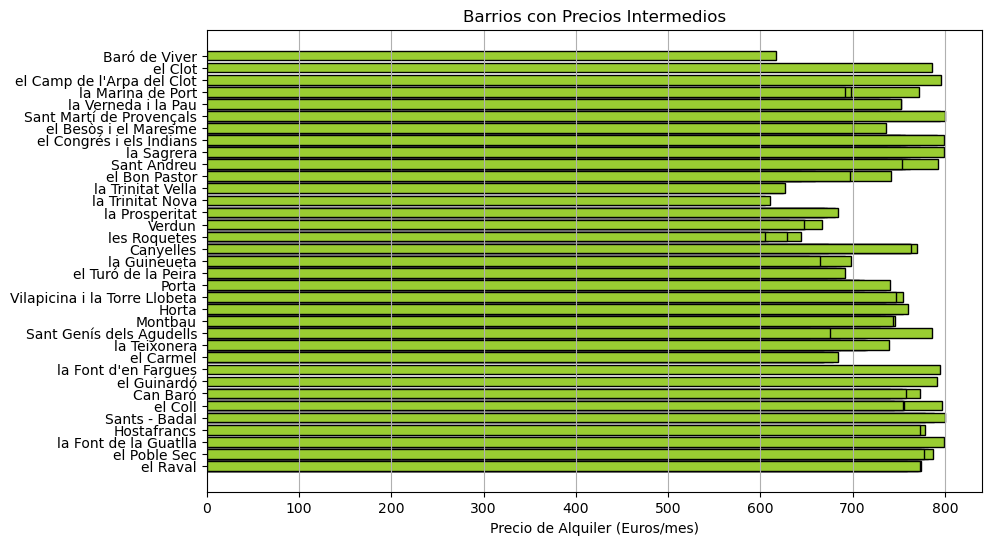

In [28]:

#Ejercicio 3: Propón alguna visualización que creas que puede resultar interesante.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/preu lloguer per trimestre i barri.csv")
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')


precio_minimo = 600  # Puedes ajustar este valor según tu criterio
precio_maximo = 800  # Puedes ajustar este valor según tu criterio

barrios_intermedios = df[(df['Preu'] >= precio_minimo) & (df['Preu'] <= precio_maximo)]

plt.figure(figsize=(10, 6))
plt.barh(barrios_intermedios['Nom_Barri'], barrios_intermedios['Preu'], color='yellowgreen', edgecolor='black')
plt.xlabel('Precio de Alquiler (Euros/mes)')
plt.title('Barrios con Precios Intermedios')
plt.grid(axis='x')

plt.show()


He propuesto un gráfico de barras horizontales que muestra los barrios con precios de alquiler dentro de un rango de precios intermedios, específicamente entre 600 y 800 euros. Este tipo de gráfico es útil para comparar visualmente los valores de una variable en diferentes categorías, o en este caso, para identificar los barrios que cumplen con ciertos criterios de precio.

Consideré importante visualizar esta información al ponerme en el lugar de una persona que está buscando alquilar una vivienda dentro del área de estudio. Este gráfico ayudará a identificar los barrios que ofrecen precios de alquiler en el rango que se considera asequible. Además, estos resultados se pueden combinar con otros datos relevantes, como la calidad de vida en los barrios, la proximidad a servicios y transporte público, para tomar decisiones más informadas sobre dónde vivir.